In [0]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
%matplotlib inline

In [0]:
url = 'https://www.rev.com/blog/tesla-cybertruck-event-transcript-elon-musk-unveils-cybertruck'

r = requests.get(url)

In [0]:
html = r.text

In [0]:
soup = BeautifulSoup(html, 'html5lib')

In [0]:
# for word in soup.select('p')[3].text.split()[3:]:
#   word = word.replace('.','')
#   word = word.replace(',','')
#   word = word.replace('’',"'")
#   print(word)

In [0]:
words = []
for p in soup.select('p')[3:]:
  for word in p.text.split()[3:]:
    word = word.replace('.','')
    word = word.replace(',','')
    word = word.replace('’',"'")
    words.append(word.lower())

In [0]:
# nltk.download('stopwords')

In [0]:
sw = nltk.corpus.stopwords.words('english')

In [0]:
words_ns = []

for word in words:
  if word not in sw:
    words_ns.append(word)

In [10]:
print(words[:10])
print(words_ns[:10])

['it', "doesn't", 'look', 'like', 'anything', 'else', 'so', "we'll", 'start', 'off']
['look', 'like', 'anything', 'else', "we'll", 'start', 'size', 'dimensions', 'inspiration', 'functionality']


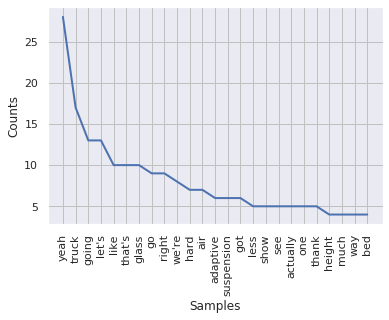

In [11]:
sns.set()

freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

In [0]:
new_sw = ['yeah',"let's",'like',"that's","we're","franz","going"]
for x in new_sw:
  sw.append(x) 

In [0]:
words_ns2 = []

for word in words:
  if word not in sw:
    words_ns2.append(word)

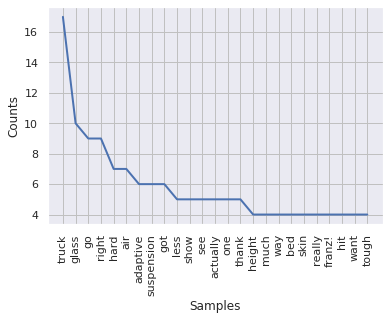

In [14]:
sns.set()

freqdist2 = nltk.FreqDist(words_ns2)
freqdist2.plot(25)

In [0]:
new_string = (" ").join(words_ns2)

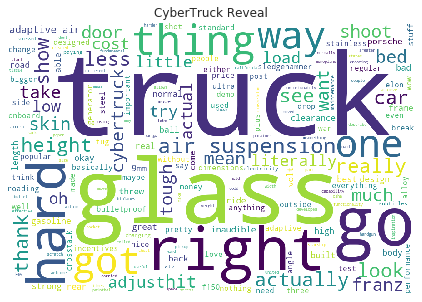

In [16]:
wordcloud = WordCloud(height = 600, width = 900, background_color = 'white').generate(new_string)
plt.imshow(wordcloud)
plt.title('CyberTruck Reveal')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
wordcloud.to_file('tesla.jpg')